In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt
import random

In [2]:
data_train= "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [3]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [4]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


In [5]:
print(xtrain.shape)
# 209 imagenes
# 64 pixeles en x
# 64 pixeles en y
# 3 color RGB

(209, 64, 64, 3)


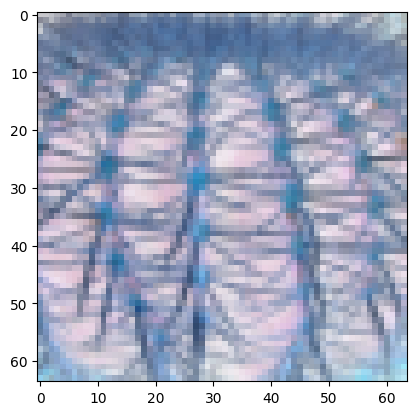

In [6]:
plt.imshow(xtrain[204])

In [7]:
# con xtrain[0] se extrae la primera imagen
np.shape(xtrain[0])

(64, 64, 3)

In [8]:
np.reshape(xtrain[0], 64*64*3) # toma todos los pixeles y los ponen en una direccion
print(np.shape(np.reshape(xtrain[0], 64*64*3)))

(12288,)


In [9]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [10]:
print(xtrain_.shape)

(209, 12288)


In [11]:
topology = [np.random.randint(1,10) for i in range(1,10)]
topology.insert(0,64*64*3)
print(topology)

[12288, 5, 5, 3, 2, 6, 4, 8, 4, 7]


In [12]:
activacion = ["sigmoid", "tanh"]

In [48]:
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1 # genera una semilla de salida de la red
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun
    self.topology = topology


  def output(self, Z, A):
    self.Z = Z
    self.A = A

def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f(x), fp

  elif activation == "tanh":
    f = lambda x: np.tanh(x)
    return f
  else :
    return 0





In [14]:
# n = len(xtrain_[208])
# Topology = [n, 4, 5, 2, 1]

In [15]:
# nn = []
# nn.append(layer_nn("sigmoid", 4, n))
# nn.append(layer_nn("sigmoid", 5, 4))
# nn.append(layer_nn("sigmoid", 2, 5))
# nn.append(layer_nn("sigmoid", 1, 2))

In [16]:
# Z = nn[0].theta @ xtrain_.T + nn[0].B
# A, Ap = act_function(Z, nn[0].act_fun)

# nn[0].output(Z,A) # actualiza

In [17]:
# np.shape(A)

In [18]:
# Z = nn[1].theta @ nn[0].A + nn[1].B
# A, Ap = act_function(Z, nn[1].act_fun)
# nn[1].output(Z,A)


In [34]:
n = len(xtrain_[0])
topology = [np.random.randint(1,10) for i in range(0,5)]
topology.insert(0, n) # features
topology.append(1) # ultima capa

In [36]:
print(topology)

[12288, 5, 6, 8, 5, 3, 1]


In [62]:
nn = []
i = 1
while i < len(topology):
  nn.append(layer_nn("sigmoid", topology[i], topology[i-1]))
  i += 1

def forward_pass(nn):
  for i in range(0, len(nn)):
    if i != 0:
      Z = nn[i].theta @ nn[i - 1 ].A + nn[i].B
    else:
      Z = nn[i].theta @ xtrain_.T + nn[i].B
    A, Ap = act_function(Z, nn[i].act_fun)

    nn[i].output(Z, A)

  return A


In [65]:
Afin = forward_pass(nn)
print(np.shape(Afin))

(1, 209)


In [68]:
print(Afin)

[[0.46665404 0.46641819 0.46619674 0.46630452 0.4664873  0.46630347
  0.4660894  0.46669381 0.46627103 0.46641501 0.46613945 0.4660903
  0.4662124  0.46608942 0.46609024 0.46641544 0.46630349 0.46629913
  0.46608939 0.46684053 0.46608939 0.46642478 0.46608939 0.46608938
  0.46609007 0.46614893 0.46608942 0.46608939 0.46648668 0.46609028
  0.46663809 0.46688633 0.46663142 0.46640836 0.4666788  0.46609032
  0.46611155 0.46608939 0.46612566 0.46641168 0.46630345 0.46662293
  0.46608939 0.46640408 0.46608939 0.46642253 0.46609102 0.46631636
  0.46633538 0.46641547 0.46609401 0.46626977 0.46611972 0.46608951
  0.46638799 0.4666389  0.46650519 0.46642628 0.46610945 0.46642711
  0.46648816 0.46641146 0.46608956 0.46663897 0.46608939 0.46608948
  0.46645019 0.4660894  0.46618985 0.46609446 0.46608939 0.46641569
  0.46640254 0.4662456  0.46641515 0.46608939 0.46630352 0.46657035
  0.4664625  0.46639098 0.46630295 0.46614567 0.46669467 0.46618191
  0.46608941 0.46648783 0.46633695 0.46609438 0.4